## IMPORTING ESSENTIAL LIBARARIES

In [77]:
print('Importing Essential Libraries...')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import sklearn
%matplotlib inline

print('Done!!!')

Importing Essential Libraries...
Done!!!


## Importing classes from sklearn 

In [78]:
#Importing the sklean classes


from sklearn.linear_model import LogisticRegression
logistic_Regression  = LogisticRegression(max_iter=10000)

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

from collections import Counter


In [79]:
pd.options.display.max_columns = 500

## Reading the data

In [80]:
print('Loading the data.....')
df = pd.read_csv('./Data/train_data.csv')
print('Done!!!')

Loading the data.....
Done!!!


In [81]:
print('The first 5 rows are: ')
df.head()

The first 5 rows are: 


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,450407,Cash loans,F,N,Y,1,67500.0,227520.0,11065.5,180000.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.018634,-17210,-774,-5580,-755,NaN,1,1,1,1,0,0,Sales staff,3.0,2,2,WEDNESDAY,12,0,0,0,0,0,0,Business Entity Type 3,NaN,0.264354,NaN,0.0124,NaN,0.9444,NaN,NaN,0.00,0.0345,0.0417,NaN,NaN,NaN,0.0095,NaN,0.000,0.0126,NaN,0.9444,NaN,NaN,0.0000,0.0345,0.0417,NaN,NaN,NaN,0.0099,NaN,0.000,0.0125,NaN,0.9444,NaN,NaN,0.00,0.0345,0.0417,NaN,NaN,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0074,Mixed,No,0.0,0.0,0.0,0.0,-150.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,271298,Cash loans,M,Y,Y,1,247500.0,1882372.5,65560.5,1719000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.018850,-18640,-96,-5711,-2175,25.0,1,1,0,1,0,1,Managers,3.0,2,2,TUESDAY,10,0,0,0,0,1,1,Business Entity Type 3,0.581064,0.172251,0.686382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-444.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0
2,122238,Cash loans,M,Y,Y,1,180000.0,101880.0,10827.0,90000.0,"Spouse, partner",Working,Higher education,Married,House / apartment,0.022625,-14649,-6130,-1776,-4568,9.0,1,1,1,1,0,0,Laborers,3.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 4,NaN,0.636218,0.540654,0.1979,0.1169,0.9841,0.7824,0.1119,0.16,0.0690,0.4583,0.5,0.1587,0.1614,0.1033,0.0,0.188,0.2017,0.1213,0.9841,0.7909,0.113,0.1611,0.0690,0.4583,0.5,0.1623,0.1763,0.1076,0.0,0.199,0.1999,0.1169,0.9841,0.7853,0.1127,0.16,0.0690,0.4583,0.5,0.1615,0.1642,0.1051,0.0,0.1919,reg oper account,block of flats,0.1789,Panel,No,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,

In [82]:
print('The data has the following information: ')
df.info()

The data has the following information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184506 entries, 0 to 184505
Columns: 122 entries, SK_ID_CURR to TARGET
dtypes: float64(64), int64(42), object(16)
memory usage: 171.7+ MB


In [83]:
print('The shape of the dataframe is:- Rows: ',df.shape[0],' Columns: ',df.shape[1])

The shape of the dataframe is:- Rows:  184506  Columns:  122


## Data visualization and Data Analytics

In [84]:
#In the given data how many loans replayed and defaulted loans.
# fig, ax = plt.subplots(figsize=(7,5))
# sns.countplot(x = 'TARGET',data = df)

In [85]:
#Who is the highest borrower? Male or Female?
# fig, ax = plt.subplots(figsize=(10,7))
# sns.countplot(x='CODE_GENDER',data=df)

In [86]:
# #How is the distribution of target labels? - Did most people return on time ?
# fig, ax = plt.subplots(figsize=(10,7))
# sns.countplot(x ='TARGET',data=df, hue='TARGET',palette="Set1")

In [87]:
# #Whether is it Female who has more difficulties or is it Male in repaying the loan?
# fig, ax = plt.subplots(figsize=(10,7))
# sns.countplot(x='TARGET',hue='CODE_GENDER',data=df)

In [88]:
# #Who owns most number of the cars? M or F?
# fig, ax = plt.subplots(figsize=(10,7))
# sns.countplot(x='CODE_GENDER', hue='FLAG_OWN_CAR', data=df,palette="Set1")

In [89]:
l1 = []
l2 = []

for i in df.columns:
    if df[i].nunique() < 100:
        l1.append(i)
    else:
        l2.append(i)
print(l1)
print(l2)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_

In [90]:
# print('Drawing Histogram!!!')
# for h in l2:
#     fig, ax = plt.subplots(1,1, figsize=(15, 6))
#     sns.histplot(df[h], palette='Blues_r')
#     fig.text(0.1, 0.95, f'{h}', fontsize=16, fontweight='bold', fontfamily='serif')
#     plt.xlabel('value ', fontsize=10)
#     plt.ylabel('count',fontsize=10)
#     plt.yticks(fontsize=13)
#     plt.box(False)


## PREPROCESSING THE ENTIRE DATASET

### FINDING THE COLUMNS THAT HAVE NULL VALUES OF MORE THAN 50%
### DROP THEM

In [91]:
to_drop=[] #this is a list that stores the names of cols having more than 50% nulls
for features in df.columns:
    percentage = (df[features].isna().sum()/df.shape[0]) *100
    if df[features].isna().sum() > 0 and percentage > 50.0:
        to_drop.append(features)
        print(features,'    ' ,df[features].isna().sum(), percentage)
        df.drop(features,axis=1,inplace=True)

OWN_CAR_AGE      121633 65.92360140049645
EXT_SOURCE_1      104074 56.40683771801459
APARTMENTS_AVG      93575 50.7165078642429
BASEMENTAREA_AVG      107975 58.521132104105014
YEARS_BUILD_AVG      122757 66.53279568144126
COMMONAREA_AVG      128971 69.90070783605952
ELEVATORS_AVG      98320 53.28823994883635
ENTRANCES_AVG      92807 50.30026123811692
FLOORSMIN_AVG      125244 67.88071932620078
LANDAREA_AVG      109543 59.37096896577889
LIVINGAPARTMENTS_AVG      126212 68.40536351121372
LIVINGAREA_AVG      92534 50.1522985702362
NONLIVINGAPARTMENTS_AVG      128146 69.45356790565076
NONLIVINGAREA_AVG      101788 55.16785361993648
APARTMENTS_MODE      93575 50.7165078642429
BASEMENTAREA_MODE      107975 58.521132104105014
YEARS_BUILD_MODE      122757 66.53279568144126
COMMONAREA_MODE      128971 69.90070783605952
ELEVATORS_MODE      98320 53.28823994883635
ENTRANCES_MODE      92807 50.30026123811692
FLOORSMIN_MODE      125244 67.88071932620078
LANDAREA_MODE      109543 59.37096896577889
L

In [92]:
print('The shape of the dataframe after deleting the columns are:- Rows: ',df.shape[0],' Columns: ',df.shape[1])

The shape of the dataframe after deleting the columns are:- Rows:  184506  Columns:  81


In [93]:
#Dropping the SK_ID_CURR column as it a primary key and has no actual use here.
df.drop('SK_ID_CURR',axis= 1,inplace= True)

In [94]:
#Check for duplicate data rows
countDuplicateRows = df[df.duplicated(subset = None, keep= False)].shape[0]
print('The number of Duplicate Rows present here are: ',countDuplicateRows)

The number of Duplicate Rows present here are:  0


## TAKING CARE OF NULL VALUES IN THE REMAINING COLUMNS

In [95]:
#We have deleted the columns with >50% Null values, but there are some columns with null values. 
#Handling them here.
#Checking the remaining columns with null values and their corresponding median and mean values and store them in a list.

count = 0
featureList = []
for features in df.columns:
    if df[features].isna().sum() > 0 and df[features].dtype != object:
        featureList.append(features)
        print(features, '   ', df[features].isna().sum(),'  ',df[features].median(), '  ',df[features].mean() )
        count += 1
print('\n\nTotal such columns are',count)

AMT_ANNUITY     6    24939.0    27114.45580487805
AMT_GOODS_PRICE     167    450000.0    538692.5954138841
CNT_FAM_MEMBERS     1    2.0    2.1527058887293027
EXT_SOURCE_2     413    0.565999028    0.5146160060113203
EXT_SOURCE_3     36656    0.53527625    0.5108943568087724
YEARS_BEGINEXPLUATATION_AVG     89900    0.9816    0.9777946810984505
FLOORSMAX_AVG     91726    0.1667    0.22596766544513902
YEARS_BEGINEXPLUATATION_MODE     89900    0.9816    0.9770830296175718
FLOORSMAX_MODE     91726    0.1667    0.22189942013364952
YEARS_BEGINEXPLUATATION_MEDI     89900    0.9816    0.9778308119992389
FLOORSMAX_MEDI     91726    0.1667    0.2255433229144212
TOTALAREA_MODE     88948    0.0687    0.10221478473806483
OBS_30_CNT_SOCIAL_CIRCLE     639    0.0    1.4261014755230683
DEF_30_CNT_SOCIAL_CIRCLE     639    0.0    0.14431083337412368
OBS_60_CNT_SOCIAL_CIRCLE     639    0.0    1.4092469012927822
DEF_60_CNT_SOCIAL_CIRCLE     639    0.0    0.10060532885183311
DAYS_LAST_PHONE_CHANGE     1    -

In [96]:
#Printing the List that we got here.(i.e names of features having some null values)
print(featureList)

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [97]:
#From the list obtained in the previous cell, we have to pick out those who have integer numbers and then fill the rest i.e float values. 
#ones with median values of the entire column.


modifiedListFeaturesWithWholeNumbers = ['CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

s = set()
for i in modifiedListFeaturesWithWholeNumbers:
    s.add(i)

#Contains only the list with floating point values.
newList = []
for i in featureList:
    if i not in s:
       newList.append(i) 
print(newList)


['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_WEEK']


In [98]:
#Replace the null values in columns with floating point values and fill it out with median of the entire column.
for i in newList:
    df[i] = df[i].fillna(df[i].median())

In [99]:
# The left out columns of the categorical type and integer numbers.

for i in df.columns:
    if df[i].isna().sum() > 0:
        print(i,df[i].dtype)


NAME_TYPE_SUITE object
OCCUPATION_TYPE object
CNT_FAM_MEMBERS float64
EMERGENCYSTATE_MODE object
OBS_30_CNT_SOCIAL_CIRCLE float64
DEF_30_CNT_SOCIAL_CIRCLE float64
OBS_60_CNT_SOCIAL_CIRCLE float64
DEF_60_CNT_SOCIAL_CIRCLE float64
AMT_REQ_CREDIT_BUREAU_HOUR float64
AMT_REQ_CREDIT_BUREAU_DAY float64
AMT_REQ_CREDIT_BUREAU_MON float64
AMT_REQ_CREDIT_BUREAU_QRT float64
AMT_REQ_CREDIT_BUREAU_YEAR float64


In [100]:
#Fill the elements in modifiedListFeaturesWithWholeNumbers with integers.
for i in modifiedListFeaturesWithWholeNumbers:
    if df[i].dtype != object:
        df[i] = df[i].fillna(int(df[i].mean()))

In [101]:
#The columns left out with still null values. These are mainly of type string/object.
categoricalData = []
for i in df.columns:
    if df[i].isna().sum() > 0:
        print(i,df[i].dtype,df[i].isna().sum())
        categoricalData.append(i)

NAME_TYPE_SUITE object 770
OCCUPATION_TYPE object 57867
EMERGENCYSTATE_MODE object 87336


In [102]:
#Finding the Columns that have values that don't make any sense.
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,'   ',df[i].unique(),'  ',df[i].isna().sum())

NAME_CONTRACT_TYPE     ['Cash loans' 'Revolving loans']    0
CODE_GENDER     ['F' 'M' 'XNA']    0
FLAG_OWN_CAR     ['N' 'Y']    0
FLAG_OWN_REALTY     ['Y' 'N']    0
NAME_TYPE_SUITE     ['Family' 'Unaccompanied' 'Spouse, partner' 'Children' nan 'Other_A'
 'Other_B' 'Group of people']    770
NAME_INCOME_TYPE     ['Commercial associate' 'Working' 'Pensioner' 'State servant' 'Student'
 'Businessman' 'Unemployed' 'Maternity leave']    0
NAME_EDUCATION_TYPE     ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']    0
NAME_FAMILY_STATUS     ['Married' 'Civil marriage' 'Single / not married' 'Separated' 'Widow'
 'Unknown']    0
NAME_HOUSING_TYPE     ['House / apartment' 'With parents' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'Co-op apartment']    0
OCCUPATION_TYPE     ['Sales staff' 'Managers' 'Laborers' nan 'Drivers' 'Core staff'
 'Low-skill Laborers' 'Private service staff' 'High skill tech staff'
 'Accountants' 'S

In [103]:
# These columns have values that don't make any sense.

print(df['CODE_GENDER'].unique())               # XNA
print(df['NAME_TYPE_SUITE'].unique())           # Other_A, Other_B
print(df['NAME_FAMILY_STATUS'].unique())        # Unknown
print(df['ORGANIZATION_TYPE'].unique())         # XNA

['F' 'M' 'XNA']
['Family' 'Unaccompanied' 'Spouse, partner' 'Children' nan 'Other_A'
 'Other_B' 'Group of people']
['Married' 'Civil marriage' 'Single / not married' 'Separated' 'Widow'
 'Unknown']
['Business Entity Type 3' 'Transport: type 4' 'Other' 'Self-employed'
 'XNA' 'Trade: type 7' 'Kindergarten' 'Transport: type 2' 'Restaurant'
 'Insurance' 'Government' 'Medicine' 'Bank' 'Industry: type 3' 'Military'
 'Security' 'Realtor' 'Industry: type 9' 'Culture'
 'Business Entity Type 2' 'Legal Services' 'Emergency' 'Postal'
 'Business Entity Type 1' 'Electricity' 'Housing' 'Trade: type 3' 'School'
 'Agriculture' 'Hotel' 'University' 'Construction' 'Police'
 'Industry: type 7' 'Security Ministries' 'Transport: type 3' 'Services'
 'Trade: type 2' 'Trade: type 6' 'Industry: type 11' 'Cleaning'
 'Industry: type 2' 'Industry: type 5' 'Religion' 'Trade: type 1' 'Mobile'
 'Industry: type 1' 'Industry: type 12' 'Industry: type 4'
 'Transport: type 1' 'Advertising' 'Telecom' 'Trade: type 5'
 'Ind

In [104]:
#Replacing these Absurd values with NaN values.

df['CODE_GENDER'] = df['CODE_GENDER'].replace('XNA',np.nan)
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].replace('Other_A',np.nan)
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].replace('Other_B',np.nan)
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].replace('Unknown',np.nan)
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].replace('XNA',np.nan)

In [105]:
#Handling the nulls in categorical data.
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].fillna(df[i].mode()[0])

#NULLS HAVE BEEN REMOVED.
df.isna().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
                             ..
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
TARGET                        0
Length: 80, dtype: int64

In [106]:
#DAYS_LAST_PHONE_CHANGE      #contians negative date values

#Need to handle this also. Can't understand what this -ve value means.


## LABEL ENCODING FOR CATEGORICAL DATA

In [107]:
#Label Encoding all the categorical object using Label Encoder.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

print('Applying Label Encoding....')
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = label_encoder.fit_transform(df[i])
print('Done!!!')

Applying Label Encoding....
Done!!!


In [108]:
x = df.drop('TARGET',axis = 1)
y = df['TARGET']

In [109]:
df['TARGET'].value_counts()

0    169611
1     14895
Name: TARGET, dtype: int64

### HANDLING THE IMBALANCED DATASET

In [110]:
import imblearn
from imblearn.over_sampling import KMeansSMOTE,SMOTE,ADASYN,SVMSMOTE
ksmote = ADASYN(0.75,random_state=42)
X_res,Y_res = ksmote.fit_resample(x,y)


print("The number of classes before fit {}",format(Counter(y)))
print("The number of classes after fit {}",format(Counter(Y_res)))

print('Shape before sampling',x.shape,y.shape)
print('Shape after sampling',X_res.shape,Y_res.shape)


/home/subham/.local/lib/python3.10/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit {} Counter({0: 169611, 1: 14895})
The number of classes after fit {} Counter({0: 169611, 1: 124176})
Shape before sampling (184506, 79) (184506,)
Shape after sampling (293787, 79) (293787,)


### TRAIN TEST SPLIT THE ENTIRE DATA

In [111]:
from sklearn.model_selection import train_test_split


X_Train,X_Test,Y_Train,Y_Test = train_test_split(X_res,Y_res,train_size= 0.7,shuffle= True,random_state=42)
print("Training Data shape:  ",X_Train.shape,Y_Train.shape)
print("Testing  Data shape:  ",X_Test.shape,Y_Test.shape)

Training Data shape:   (205650, 79) (205650,)
Testing  Data shape:   (88137, 79) (88137,)


## Finding the correlation of the inpendent features with the output.

In [112]:


abs_corr_matrix = X_Train.corr().abs()                               #absoulte value correlation matrix
corr_target_checker = abs_corr_matrix[len(abs_corr_matrix)-1:]  #corr of target
corr_target_checker
to_drop=[]                                                      # A list that stores col names of low corr
count = 0
for i in corr_target_checker.columns:
    if corr_target_checker[i].sum() < 0.0005:
        print('Value: ',corr_target_checker[i].sum(),'Feature Name: ',i)
        to_drop.append(i)
        count += 1
print(count)
print(to_drop)

print('Dropping Columns....')
print(X_Train.shape)
X_Train.drop(to_drop,axis= 1,inplace= True)
print(X_Train.shape)
print('Done!!')

Value:  0.0 Feature Name:  FLAG_DOCUMENT_12
1
['FLAG_DOCUMENT_12']
Dropping Columns....
(205650, 79)
(205650, 78)
Done!!


### FEATURE SELECTION USING RANDOM FOREST

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


# For Random Forest Classifier
sel = SelectFromModel(RandomForestClassifier(n_estimators= 100,criterion= 'entropy'))
sel.fit(X_Train,Y_Train)


# # For Decision Tree Classifier
# sel = SelectFromModel(ExtraTreesClassifier(n_estimators= 100,criterion= 'gini'))
# sel.fit(X_Train,Y_Train)


selected_features = X_Train.columns[(sel.get_support())]
print("The Number of features selected are: ",len(selected_features))
print("The features selected are: ",selected_features)

# pd.series(sel.estimator_,feature_importa).hist()

#Dropping the columns that are not present in the selected_features list

for i in X_Train.columns:
    if i not in selected_features:
        X_Train.drop(i,axis= 1,inplace= True)


The Number of features selected are:  32
The features selected are:  Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


In [114]:
#Storing the selected_features for doing EDA on the Test Data.
%store selected_features

Stored 'selected_features' (Index)


In [115]:
print(X_Train.columns)

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


## Removing Outliers Using IQR

In [116]:
# #Plotting BoxPlot of the left out columns to check if they have any outliers.
# print('Before Removing Outliers')
# count = 0
# for i in X_Train.columns:
#     fig = plt.figure(figsize=(7,4))
#     plt.boxplot(X_Train[i])
#     plt.suptitle(i)
#     plt.show()
#     count += 1

# print('Total Boxplots printed are: ',count)


In [117]:
#Now find the outliers using IQR Method and remove them from the entire data X_Train
def drop_outliers_IQR(df,feature):
    iqr = 1.5*( np.percentile(df[feature],75) - np.percentile(df[feature],25)   )
    # df.drop( df[df[feature] > (iqr + np.percentile(df[feature],75))].index,inplace= True )
    # df.drop( df[df[feature] < (np.percentile(df[feature],25) - iqr)].index,inplace= True )

    df.loc[df[feature] > (iqr + np.percentile(df[feature],75))] = df[feature].mean()
    df.loc[df[feature] < (np.percentile(df[feature],25) - iqr)] = df[feature].mean()
    #df[feature] = df[feature].fillna(df[feature].mean())
   

for i in X_Train.columns:
    drop_outliers_IQR(X_Train,i)


# drop_outliers_IQR(X_Train,'CNT_CHILDREN')
# drop_outliers_IQR(X_Train,'NAME_FAMILY_STATUS')
# drop_outliers_IQR(X_Train,'NAME_HOUSING_TYPE')
# drop_outliers_IQR(X_Train,'OCCUPATION_TYPE')
# drop_outliers_IQR(X_Train,'CNT_FAM_MEMBERS')
# drop_outliers_IQR(X_Train,'HOUR_APPR_PROCESS_START')
# drop_outliers_IQR(X_Train,'EXT_SOURCE_1')
# drop_outliers_IQR(X_Train,'EXT_SOURCE_3')
# drop_outliers_IQR(X_Train, 'ENTRANCES_MODE')
# drop_outliers_IQR(X_Train,'FLOORSMAX_MODE')
# drop_outliers_IQR(X_Train,'FLOORSMAX_MEDI')
# drop_outliers_IQR(X_Train,'WALLSMATERIAL_MODE')
# drop_outliers_IQR(X_Train,'DEF_30_CNT_SOCIAL_CIRCLE')
# drop_outliers_IQR(X_Train,'OBS_60_CNT_SOCIAL_CIRCLE')
# drop_outliers_IQR(X_Train,'DEF_60_CNT_SOCIAL_CIRCLE')
# drop_outliers_IQR(X_Train,'AMT_REQ_CREDIT_BUREAU_DAY')
# drop_outliers_IQR(X_Train,'AMT_REQ_CREDIT_BUREAU_WEEK')
# drop_outliers_IQR(X_Train,'AMT_REQ_CREDIT_BUREAU_QRT')
# drop_outliers_IQR(X_Train,'AMT_REQ_CREDIT_BUREAU_YEAR')


In [118]:
# #Plotting BoxPlot of the left out columns after removal of outliers.
# print('After Removing Outliers')
# count = 0
# for i in X_Train.columns:
#     fig = plt.figure(figsize=(7,4))
#     plt.boxplot(X_Train[i])
#     plt.suptitle(i)
#     plt.show()
#     count += 1

# print('Total Boxplots printed are: ',count)

In [119]:
print(X_Train.shape,Y_Train.shape)

(205650, 32) (205650,)


### REMOVING THE COLUMNS FROM THE TEST DATA PART

In [120]:
for i in X_Test.columns:
    if i not in selected_features:
        X_Test.drop(i,axis=1,inplace=True)


## SCALING THE ENTIRE DATA USING STANDARD SCALAR

In [121]:
print('Applying Scaling on the training data only for the features...')
scaler = StandardScaler()
scaler.fit(X_Train)
X_Train_scaled = scaler.transform(X_Train)
print('Done!!')
#Pass this scaled data as input to the Logistic Regression.

Applying Scaling on the training data only for the features...
Done!!


## IMPLEMENTING LOGISTIC REGRESSION

In [122]:
logistic_Regression.fit(X_Train,Y_Train)
Y_Pred = logistic_Regression.predict(X_Test)

lacc = accuracy_score(Y_Pred,Y_Test)
lf1 = f1_score(Y_Pred,Y_Test)
lauc_score = roc_auc_score(Y_Pred,Y_Test)
print('The accuracy of the model on training data is: ')

print('The accuracy  is: ',lacc*100,'%')
print('The value of f1_score is: ',lf1*100,'%')
print('The value of Roc AUC Score is: ',lauc_score*100,'%')

print("The confusion matrix is: \n\n",confusion_matrix(Y_Test,Y_Pred))
print("The classification report is: \n\n",classification_report(Y_Test,Y_Pred))


The accuracy of the model on training data is: 
The accuracy  is:  54.19744261774283 %
The value of f1_score is:  45.33723307741263 %
The value of Roc AUC Score is:  52.970851750717465 %
The confusion matrix is: 

 [[31027 19885]
 [20484 16741]]
The classification report is: 

               precision    recall  f1-score   support

           0       0.60      0.61      0.61     50912
           1       0.46      0.45      0.45     37225

    accuracy                           0.54     88137
   macro avg       0.53      0.53      0.53     88137
weighted avg       0.54      0.54      0.54     88137



## IMPLEMENTING K NEAREST NEIGHBOURS

In [123]:
# from sklearn.neighbors import KNeighborsClassifier

# for k in range(1, 100, 5):
#     k = k + 1
#     knn = KNeighborsClassifier(n_neighbors = k).fit(X_Train,Y_Train)
#     acc = knn.score(X_Test,Y_Test)
#     print("Accuracy for k = ",k," is: ",acc)

# Here we are selecting which is the best n value for the KNN algo

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 2).fit(X_Train,Y_Train)
Y_Pred = knn.predict(X_Test)
kacc = accuracy_score(Y_Pred,Y_Test)
kf1 = f1_score(Y_Pred,Y_Test)
kauc_score = roc_auc_score(Y_Pred,Y_Test)


print('The accuracy of the model on Data is: ')

print('The accuracy  is: ',kacc*100,'%')
print('The value of f1_score is: ',kf1*100,'%')
print('The value of Roc AUC Score is: ',kauc_score*100,'%')

print("The confusion matrix is: \n\n",confusion_matrix(Y_Test,Y_Pred))
print("The classification report is: \n\n",classification_report(Y_Test,Y_Pred))


The accuracy of the model on Data is: 
The accuracy  is:  81.34495160942623 %
The value of f1_score is:  77.40241891148982 %
The value of Roc AUC Score is:  81.00395687044755 %
The confusion matrix is: 

 [[43536  7376]
 [ 9066 28159]]
The classification report is: 

               precision    recall  f1-score   support

           0       0.83      0.86      0.84     50912
           1       0.79      0.76      0.77     37225

    accuracy                           0.81     88137
   macro avg       0.81      0.81      0.81     88137
weighted avg       0.81      0.81      0.81     88137



## IMPLEMENTING SUPPORT VECTOR MACHINES(SVM)

In [125]:
# from sklearn.svm import SVC


# svc = SVC()
# svc.fit(X_Train,Y_Train)

# Y_Pred = svc.predict(X_Test)
# acc = accuracy_score(Y_Pred,Y_Test)
# f1 = f1_score(Y_Pred,Y_Test)
# auc_score = roc_auc_score(Y_Pred,Y_Test)


# print('The accuracy of the model on Data is: ')

# print('The accuracy  is: ',acc*100,'%')
# print('The value of f1_score is: ',f1*100,'%')
# print('The value of Roc AUC Score is: ',auc_score*100,'%')

# print("The confusion matrix is: \n\n",confusion_matrix(Y_Test,Y_Pred))
# print("The classification report is: \n\n",classification_report(Y_Test,Y_Pred))




## IMPLEMENTING XGBOOST 

In [126]:
from xgboost import XGBClassifier

#### applying Grid Search CV to get the best hyperparameters for the XGBoost classifier

In [127]:
# xgb_model = XGBClassifier(random_state = 30)
# search_space = {
#     "n_estimators" :   [100,200],
#     "max_depth" :      [3,6,7],
#     "gamma" :          [0.01,0.1],
#     "learning_rate" :  [0.001,0.01,0.1,1]
# }

# from sklearn.model_selection import GridSearchCV
# GS = GridSearchCV(
#     estimator= xgb_model,
#     param_grid= search_space,
#     scoring= ["roc_auc","roc_auc_ovr","roc_auc_ovo","f1","f1_micro","f1_macro","accuracy"],
#     refit= "roc_auc",
#     cv= 5,
#     verbose= 4
# )

# GS.fit(X_Train,Y_Train)

# print("The best estimator is: ",GS.best_estimator_)
# print("The best parameter is: ",GS.best_params_)
# print("The best AUC_ROC score is: ",GS.best_score_)
# df_XGBoost = pd.DataFrame(GS.cv_results_)
# df_XGBoost = df_XGBoost.sort_values("rank_test_roc_auc")
# df_XGBoost.to_csv('./Test_Output/XGBoost_GridSearchCV.csv')

In [128]:
model_XGB = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=30)

model_XGB.fit(X_Train,Y_Train)

Y_Pred = model_XGB.predict(X_Test)
xacc = accuracy_score(Y_Pred,Y_Test)
xf1 = f1_score(Y_Pred,Y_Test)
xauc_score = roc_auc_score(Y_Pred,Y_Test)


print('The accuracy of the model on Data is: ')

print('The accuracy  is: ',xacc*100,'%')
print('The value of f1_score is: ',xf1*100,'%')
print('The value of Roc AUC Score is: ',xauc_score*100,'%')

print("The confusion matrix is: \n\n",confusion_matrix(Y_Test,Y_Pred))
print("The classification report is: \n\n",classification_report(Y_Test,Y_Pred))


The accuracy of the model on Data is: 
The accuracy  is:  94.39055107389632 %
The value of f1_score is:  92.92582417582416 %
The value of Roc AUC Score is:  95.42363134738962 %
The confusion matrix is: 

 [[50721   191]
 [ 4753 32472]]
The classification report is: 

               precision    recall  f1-score   support

           0       0.91      1.00      0.95     50912
           1       0.99      0.87      0.93     37225

    accuracy                           0.94     88137
   macro avg       0.95      0.93      0.94     88137
weighted avg       0.95      0.94      0.94     88137



## IMPLEMENTING DECISION TREES

In [129]:
dt = DecisionTreeClassifier()
dt.fit(X_Train,Y_Train)
Y_Pred = dt.predict(X_Test)
dacc = accuracy_score(Y_Pred,Y_Test)
df1 = f1_score(Y_Pred,Y_Test)
dauc_score = roc_auc_score(Y_Pred,Y_Test)


print('The accuracy of the model on Data is: ')

print('The accuracy  is: ',dacc*100,'%')
print('The value of f1_score is: ',df1*100,'%')
print('The value of Roc AUC Score is: ',dauc_score*100,'%')

print("The confusion matrix is: \n\n",confusion_matrix(Y_Test,Y_Pred))
print("The classification report is: \n\n",classification_report(Y_Test,Y_Pred))


The accuracy of the model on Data is: 
The accuracy  is:  83.97721728672408 %
The value of f1_score is:  81.77477221691659 %
The value of Roc AUC Score is:  83.55685583288484 %
The confusion matrix is: 

 [[42333  8579]
 [ 5543 31682]]
The classification report is: 

               precision    recall  f1-score   support

           0       0.88      0.83      0.86     50912
           1       0.79      0.85      0.82     37225

    accuracy                           0.84     88137
   macro avg       0.84      0.84      0.84     88137
weighted avg       0.84      0.84      0.84     88137



## IMPLEMENTING RANDOM FOREST

In [130]:
rf = RandomForestClassifier().fit(X_Train,Y_Train)
Y_Pred = rf.predict(X_Test)
racc = accuracy_score(Y_Pred,Y_Test)
rf1 = f1_score(Y_Pred,Y_Test)
rauc_score = roc_auc_score(Y_Pred,Y_Test)


print('The accuracy of the model on Data is: ')

print('The accuracy  is: ',racc*100,'%')
print('The value of f1_score is: ',rf1*100,'%')
print('The value of Roc AUC Score is: ',rauc_score*100,'%')

print("The confusion matrix is: \n\n",confusion_matrix(Y_Test,Y_Pred))
print("The classification report is: \n\n",classification_report(Y_Test,Y_Pred))


The accuracy of the model on Data is: 
The accuracy  is:  92.8633831421537 %
The value of f1_score is:  90.90672526455792 %
The value of Roc AUC Score is:  94.06124007676824 %
The confusion matrix is: 

 [[50406   506]
 [ 5784 31441]]
The classification report is: 

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     50912
           1       0.98      0.84      0.91     37225

    accuracy                           0.93     88137
   macro avg       0.94      0.92      0.93     88137
weighted avg       0.93      0.93      0.93     88137



## IMPLEMENTING VARIOUS NAIVE BAYES ALGO

In [131]:
##GAUSSIAN NAIVE BAYES

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_Train,Y_Train)
Y_Pred = model.predict(X_Test)
gnbacc = accuracy_score(Y_Pred,Y_Test)
gnbf1 = f1_score(Y_Pred,Y_Test)
gnbauc_score = roc_auc_score(Y_Pred,Y_Test)


print('The accuracy of the model on Data is: ')

print('The accuracy  is: ',gnbacc*100,'%')
print('The value of f1_score is: ',gnbf1*100,'%')
print('The value of Roc AUC Score is: ',gnbauc_score*100,'%')

print("The confusion matrix is: \n\n",confusion_matrix(Y_Test,Y_Pred))
print("The classification report is: \n\n",classification_report(Y_Test,Y_Pred))


The accuracy of the model on Data is: 
The accuracy  is:  47.99800310879653 %
The value of f1_score is:  58.77771282097406 %
The value of Roc AUC Score is:  56.046727358311955 %
The confusion matrix is: 

 [[ 9628 41284]
 [ 4549 32676]]
The classification report is: 

               precision    recall  f1-score   support

           0       0.68      0.19      0.30     50912
           1       0.44      0.88      0.59     37225

    accuracy                           0.48     88137
   macro avg       0.56      0.53      0.44     88137
weighted avg       0.58      0.48      0.42     88137



In [132]:
## BERNOULLI NAIVE BAYES

from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_Train,Y_Train)
Y_Pred = model.predict(X_Test)
bnbacc = accuracy_score(Y_Pred,Y_Test)
bnbf1 = f1_score(Y_Pred,Y_Test)
bnbauc_score = roc_auc_score(Y_Pred,Y_Test)


print('The accuracy of the model on Data is: ')

print('The accuracy  is: ',bnbacc*100,'%')
print('The value of f1_score is: ',bnbf1*100,'%')
print('The value of Roc AUC Score is: ',bnbauc_score*100,'%')

print("The confusion matrix is: \n\n",confusion_matrix(Y_Test,Y_Pred))
print("The classification report is: \n\n",classification_report(Y_Test,Y_Pred))


The accuracy of the model on Data is: 
The accuracy  is:  62.812439724519784 %
The value of f1_score is:  67.14844141525508 %
The value of Roc AUC Score is:  69.49479350797404 %
The confusion matrix is: 

 [[21864 29048]
 [ 3728 33497]]
The classification report is: 

               precision    recall  f1-score   support

           0       0.85      0.43      0.57     50912
           1       0.54      0.90      0.67     37225

    accuracy                           0.63     88137
   macro avg       0.69      0.66      0.62     88137
weighted avg       0.72      0.63      0.61     88137



## COMPARING ALL THE MODELS

In [133]:
from prettytable import PrettyTable


t = PrettyTable(['ALGO','ACCURACY SCORE','F1 SCORE','ROC-AUC SCORE'])
t.add_row(['Logistic Regression',round(lacc,2),round(lf1,2),round(lauc_score,2)])
t.add_row(['KNN',round(kacc,2),round(kf1,2),round(kauc_score,2)])
t.add_row(['XG Boost',round(xacc,2),round(xf1,2),round(xauc_score,2)])
t.add_row(['Decision Trees',round(dacc,2),round(df1,2),round(dauc_score,2)])
t.add_row(['Random Forest',round(racc,2),round(rf1,2),round(rauc_score,2)])
t.add_row(['Gaussian NB', round(gnbacc,2),round(gnbf1,2),round(gnbauc_score,2)])
t.add_row(['Bernoulli NB',round(bnbacc,2),round(bnbf1,2),round(bnbauc_score,2)])


print(t)

#Looking at the values it can be concluded that the best algo is XGBOOST!!!!

+---------------------+----------------+----------+---------------+
|         ALGO        | ACCURACY SCORE | F1 SCORE | ROC-AUC SCORE |
+---------------------+----------------+----------+---------------+
| Logistic Regression |      0.54      |   0.45   |      0.53     |
|         KNN         |      0.81      |   0.77   |      0.81     |
|       XG Boost      |      0.94      |   0.93   |      0.95     |
|    Decision Trees   |      0.84      |   0.82   |      0.84     |
|    Random Forest    |      0.93      |   0.91   |      0.94     |
|     Gaussian NB     |      0.48      |   0.59   |      0.56     |
|     Bernoulli NB    |      0.63      |   0.67   |      0.69     |
+---------------------+----------------+----------+---------------+


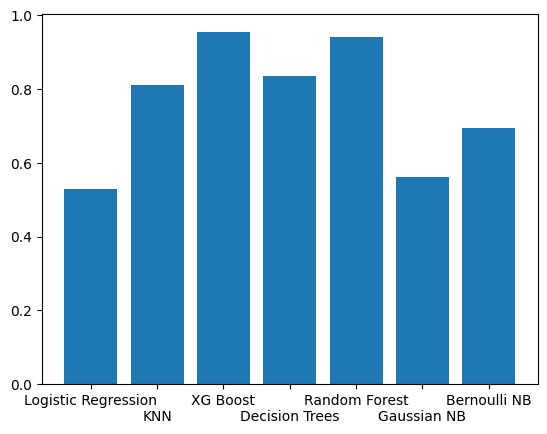

In [161]:
x_axis = np.array(["Logistic Regression","\nKNN","XG Boost","\nDecision Trees","Random Forest","\nGaussian NB","Bernoulli NB"])
y_axis = np.array([lauc_score,kauc_score,xauc_score,dauc_score,rauc_score,gnbauc_score,bnbauc_score])
plt.bar(x_axis,y_axis,align= 'center',width= 0.8)
plt.show()

In [ ]:
## Hence use XG Boost!!

### IMPORTING THE TEST DATASET

In [134]:
print('Loading the test data.....')
df_test = pd.read_csv('./Data/test_data.csv')
print('Done!!!')

Loading the test data.....
Done!!!


In [135]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,367294,Cash loans,F,N,Y,0,180000.0,265306.5,25317.0,252000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.032561,-21413,-5323,-3666.0,-4551,NaN,1,1,0,1,1,0,NaN,2.0,1,1,TUESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.708546,NaN,0.2397,0.1319,0.9901,0.8572,0.1315,0.28,0.1293,0.5208,0.5417,0.0768,0.3165,0.1783,0.0039,0.0072,0.0504,0.0623,0.9831,0.7779,0.0299,0.0806,0.0345,0.3333,0.3750,0.0243,0.2461,0.0280,0.0,0.0015,0.2056,0.1230,0.9901,0.8591,0.1324,0.28,0.1207,0.5417,0.5417,0.0383,0.3219,0.1299,0.0039,0.0047,reg oper account,block of flats,0.2362,Panel,No,1.0,0.0,1.0,0.0,-1547.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,2.0,5.0
1,439847,Cash loans,F,N,Y,0,202500.0,346500.0,21069.0,346500.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.026392,-20087,-1406,-7258.0,-3639,NaN,1,1,0,1,0,0,Sales staff,1.0,2,2,THURSDAY,13,0,0,0,0,0,0,Trade: type 7,NaN,0.649626,0.513694,0.1959,0.1737,0.9871,NaN,NaN,0.00,0.4483,0.1667,NaN,0.1153,NaN,0.1748,NaN,0.0010,0.1996,0.1803,0.9871,NaN,NaN,0.0000,0.4483,0.1667,NaN,0.1180,NaN,0.1821,NaN,0.0010,0.1978,0.1737,0.9871,NaN,NaN,0.00,0.4483,0.1667,NaN,0.1173,NaN,0.1779,NaN,0.0010,NaN,block of flats,0.1375,Panel,No,0.0,0.0,0.0,0.0,-415.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
2,380562,Cash loans,M,Y,N,0,360000.0,545040.0,36553.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13008,-1874,-4975.0,-5324,18.0,1,1,0,1,0,0,Managers,2.0,2,2,TUESDAY,4,0,0,0,0,0,0,Business Entity Type 3,0.266554,0.645383,0.740799,0.0825,0.0671,0.9757,0.6668,0.0290,0.00,0.1379,0.1667,0.2083,0.1238,0.0672,0.0704,0.0000,0.0000,0.0840,0.0696,0.9757,0.6798,0.0293,0.0000,0.1379,0.1667,0.2083,0.1267,0.0735,0.0

In [136]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123005 entries, 0 to 123004
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 113.6+ MB


In [137]:
id_column = df_test['SK_ID_CURR']

### Dropping the unnecessary columns from test dataset

In [138]:
# Dropping all the columns that are not in X_Train
for i in df_test.columns:
    if i not in selected_features:
        df_test.drop(i,axis=1,inplace= True)

print(df_test.shape)


(123005, 32)


### Removing the Unnecessary values

In [139]:
for i in df_test.columns:
    if df_test[i].dtype == 'object':
        print("Column: ",i," Values: ",df_test[i].unique())

df_test['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].replace('XNA',np.nan)

Column:  FLAG_OWN_CAR  Values:  ['N' 'Y']
Column:  FLAG_OWN_REALTY  Values:  ['Y' 'N']
Column:  OCCUPATION_TYPE  Values:  [nan 'Sales staff' 'Managers' 'Accountants' 'Laborers' 'Medicine staff'
 'High skill tech staff' 'Core staff' 'Cleaning staff' 'Cooking staff'
 'Drivers' 'Security staff' 'Secretaries' 'Low-skill Laborers'
 'Private service staff' 'Waiters/barmen staff' 'Realty agents' 'HR staff'
 'IT staff']
Column:  WEEKDAY_APPR_PROCESS_START  Values:  ['TUESDAY' 'THURSDAY' 'WEDNESDAY' 'FRIDAY' 'SATURDAY' 'MONDAY' 'SUNDAY']
Column:  ORGANIZATION_TYPE  Values:  ['Business Entity Type 3' 'Trade: type 7' 'Self-employed' 'XNA'
 'Trade: type 3' 'Industry: type 9' 'Security Ministries'
 'Business Entity Type 1' 'Industry: type 4' 'Government' 'School'
 'Medicine' 'Industry: type 3' 'Kindergarten' 'Military' 'Security'
 'Business Entity Type 2' 'Construction' 'Industry: type 11'
 'Transport: type 4' 'Other' 'Postal' 'Culture' 'Agriculture'
 'Industry: type 1' 'Industry: type 7' 'Universi

### Handling the NULL Values

In [140]:
for i in df_test.columns:
    if df_test[i].dtype == 'object':
        df_test[i] = df_test[i].fillna(df_test[i].mode()[0])
    if df_test[i].dtype == 'int64':
        df_test[i] = df_test[i].fillna(int(df_test[i].mean()))
    if df_test[i].dtype == 'float64':
        df_test[i] = df_test[i].fillna(df_test[i].median())

### Applying the Label Encoding

In [141]:
#Segregating the categorical and non-categorical data
cat = []
for i in df_test.columns:
    if df_test[i].dtype == 'object':
        cat.append(i)

from sklearn import preprocessing
label_encoder_test = preprocessing.LabelEncoder()

print('Applying Label Encoding to only Categorical Data....')
for i in cat:
    df_test[i] = label_encoder_test.fit_transform(df_test[i])

print('Done!!!')



Applying Label Encoding to only Categorical Data....
Done!!!


### Apply OutLier Removing from non categorical columns in Test Data

In [142]:
def drop_outliers_IQR(df,feature):
    iqr = 1.5*( np.percentile(df[feature],75) - np.percentile(df[feature],25)   )
    # df.drop( df[df[feature] > (iqr + np.percentile(df[feature],75))].index,inplace= True )
    # df.drop( df[df[feature] < (np.percentile(df[feature],25) - iqr)].index,inplace= True )

    df.loc[df[feature] > (iqr + np.percentile(df[feature],75))] = df[feature].mean()
    df.loc[df[feature] < (np.percentile(df[feature],25) - iqr)] = df[feature].mean()
    #df[feature] = df[feature].fillna(df[feature].mean())
   

for i in df_test.columns:
    if i not in cat:
        drop_outliers_IQR(df_test,i)

##### The test data is ready and could be now applied to the model.

### Lets apply the best model for which we got the highest AUC_ROC Score i.e XGBoost

In [143]:
Y_Pred_final = model_XGB.predict(df_test)

# Here Y_Pred_final is the final data prepared by us now we need to upload it to  kaggle.


print(type(Y_Pred_final))
print(type(id_column))


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


## Exporting the Data for Kaggle Competition

In [144]:
df_kaggle = id_column.to_frame()

df_kaggle['TARGET'] = Y_Pred_final.tolist()

df_kaggle.to_csv('./Test_Output/Submission_XGB.csv',index= None)